<a href="https://colab.research.google.com/github/aaryamanz/Aaryaman-Singh-Website/blob/main/Portfolio_Optimization_using_MPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance pandas numpy matplotlib scipy

Collecting Real Stock Data till 2024 (MAY)

We selected a portfolio of stocks [S&P500],large-cap stocks like Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Google(GOOGL), Tesla(TSLA). These stocks are highly liquid and are part of large-cap, technology-oriented portfolios. They tend to exhibit growth characteristics but also have varying risk-return profiles, which makes them suitable for portfolio optimization using Modern Portfolio Theory.

We are considering 6 years time frame.


In [ ]:
import yfinance as yf
import pandas as pd

tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'TSLA']

data = yf.download(tickers, start='2018-01-01', end='2024-05-01')['Adj Close']

returns = data.pct_change().dropna()

print(returns.head())

[*********************100%***********************]  5 of 5 completed

Ticker                         AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                                       
2018-01-03 00:00:00+00:00 -0.000174  0.012775  0.017061  0.004654 -0.010233
2018-01-04 00:00:00+00:00  0.004645  0.004476  0.003884  0.008801 -0.008290
2018-01-05 00:00:00+00:00  0.011385  0.016163  0.013260  0.012398  0.006230
2018-01-08 00:00:00+00:00 -0.003714  0.014425  0.003531  0.001020  0.062638
2018-01-09 00:00:00+00:00 -0.000115  0.004676 -0.001274 -0.000680 -0.008085


In [ ]:
# mean daily returns
mean_returns = returns.mean()

# covariance matrix of returns
cov_matrix = returns.cov()

# Display the results
print("Mean Returns:\n", mean_returns)
print("Covariance Matrix:\n", cov_matrix)

Mean Returns:
 Ticker
AAPL     0.001094
AMZN     0.000921
GOOGL    0.000892
MSFT     0.001169
TSLA     0.002149
dtype: float64
Covariance Matrix:
 Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    0.000387  0.000267  0.000256  0.000273  0.000363
AMZN    0.000267  0.000485  0.000288  0.000288  0.000361
GOOGL   0.000256  0.000288  0.000389  0.000279  0.000297
MSFT    0.000273  0.000288  0.000279  0.000350  0.000324
TSLA    0.000363  0.000361  0.000297  0.000324  0.001601


In [ ]:
import numpy as np

# Portfolio simulation
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # weights sum to 1

    # Expected portfolio return and risk
    portfolio_return = np.sum(weights * mean_returns) * 252  # Annualized return
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Annualized volatility

    # Sharpe Ratio (assuming risk-free rate is 0 for simplicity)
    sharpe_ratio = portfolio_return / portfolio_stddev

    # Save results: return, stddev, Sharpe Ratio
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = sharpe_ratio


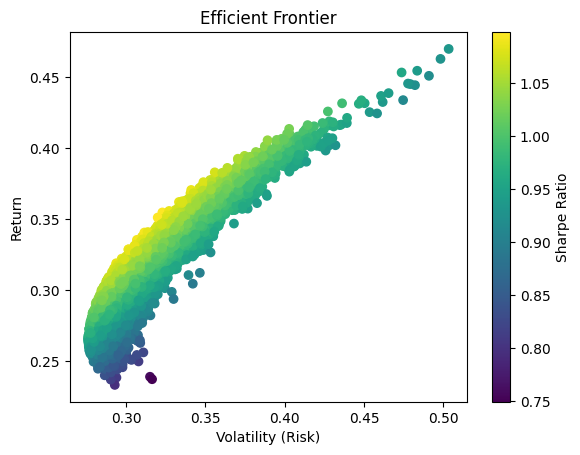

In [ ]:
import matplotlib.pyplot as plt

# Plotting the efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()


Optimal Weights for Tangency Portfolio:
 [1.37723003e-01 6.47810798e-17 1.04083409e-17 6.24730906e-01
 2.37546091e-01]
Max Sharpe Ratio: 1.0405059427172143


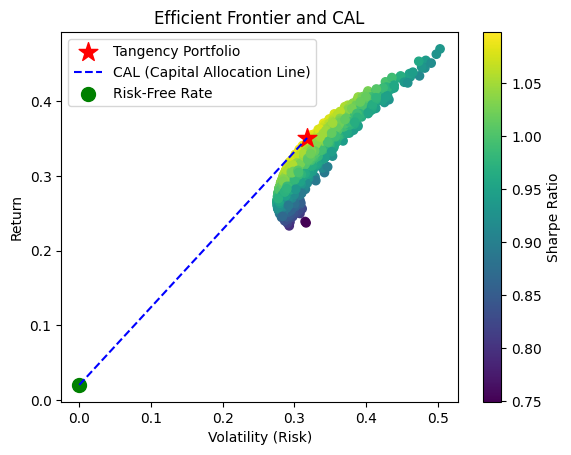

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# risk-free rate
risk_free_rate = 0.02  # 2% annual risk-free rate

# Function to calculate portfolio return and volatility
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(weights * mean_returns) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))
    return portfolio_return, portfolio_stddev

# Function to calculate negative Sharpe Ratio
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return, portfolio_stddev = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(portfolio_return - risk_free_rate) / portfolio_stddev

# Constraints: sum of weights must be 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Bounds for the weights (between 0 and 1)
bounds = tuple((0, 1) for _ in range(len(tickers)))

# Initial guess for weights
initial_weights = np.ones(len(tickers)) / len(tickers)

# Optimize for maximum Sharpe Ratio (minimize negative Sharpe Ratio)
optimized_result = minimize(negative_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimized weights for the tangency portfolio (maximum Sharpe Ratio portfolio)
optimal_weights = optimized_result.x
tangency_return, tangency_risk = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
max_sharpe_ratio = (tangency_return - risk_free_rate) / tangency_risk

print("Optimal Weights for Tangency Portfolio:\n", optimal_weights)
print("Max Sharpe Ratio:", max_sharpe_ratio)

# Plot the efficient frontier
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', marker='o')
plt.title('Efficient Frontier and CAL')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')

# Plot the tangency portfolio (point with the max Sharpe Ratio)
plt.scatter(tangency_risk, tangency_return, color='red', marker='*', s=200, label='Tangency Portfolio')

# Plot the Capital Allocation Line (CAL)
# CAL: straight line from the risk-free rate to the tangency portfolio
cal_x = [0, tangency_risk]
cal_y = [risk_free_rate, tangency_return]
plt.plot(cal_x, cal_y, color='blue', linestyle='--', label='CAL (Capital Allocation Line)')

# Mark the risk-free rate on the graph
plt.scatter(0, risk_free_rate, color='green', marker='o', s=100, label='Risk-Free Rate')

plt.legend()
plt.show()
